<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/2025_0730_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# [[x_train, y_train], [x_test, y_test]]
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [4]:
# 看到array: numpy array
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)

In [ ]:
import matplotlib.pyplot as plt
print(trans[y_train[0]])
plt.imshow(x_train[0])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
layers = [
    # 64種過濾方式(3 * 3)
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # Dense(128, activation=relu),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,106 (5.94 MB)

 Trainable params: 1,556,106 (5.94 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [13]:
# 5 -> 0 0 0 0 0 1 0 0 0 0
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
# 攤平
# 每個框架對於x輸入其實有個建議數值
# 因為框架是根據建議數值範圍來隨機係數的
# tensorflow/torch: -1~1 0~1(先用這個) 兩種
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [15]:
# batch_size: 你看多少筆資料才實行一次梯度下降
# epochs: 整份資料看幾輪(防止過擬合)
# 真實訓練: 54000(60000-6000)
# 什麼都沒改: 30epochs: 訓練好 95%
# / 255.0  : 60epochs:       97%
# relu:    : 30epochs:       97.8%
# mse->crossentropy: 10 epochs: 97.9%
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    EarlyStopping(patience=5),
    ModelCheckpoint("mnist.keras", save_best_only=True)
]

model.fit(x=x_train_norm,
          y=y_train_cat,
          batch_size=100,
          epochs=100,
          validation_split=0.1,
          callbacks=c)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2356 - loss: 2.0508 - val_accuracy: 0.4952 - val_loss: 1.3938
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4871 - loss: 1.4199 - val_accuracy: 0.6112 - val_loss: 1.0943
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6012 - loss: 1.1284 - val_accuracy: 0.6100 - val_loss: 1.0978
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6731 - loss: 0.9241 - val_accuracy: 0.7172 - val_loss: 0.7934
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7361 - loss: 0.7637 - val_accuracy: 0.7144 - val_loss: 0.8213
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7739 - loss: 0.6410 - val_accuracy: 0.7448 - val_loss: 0.7703
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8130 - loss: 0.5374 - val_accuracy: 0.7918 - val_loss: 0.6401
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8511 - loss: 0.437

In [16]:
model.evaluate(x_test_norm, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7668 - loss: 0.9348


[0.962234377861023, 0.763700008392334]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


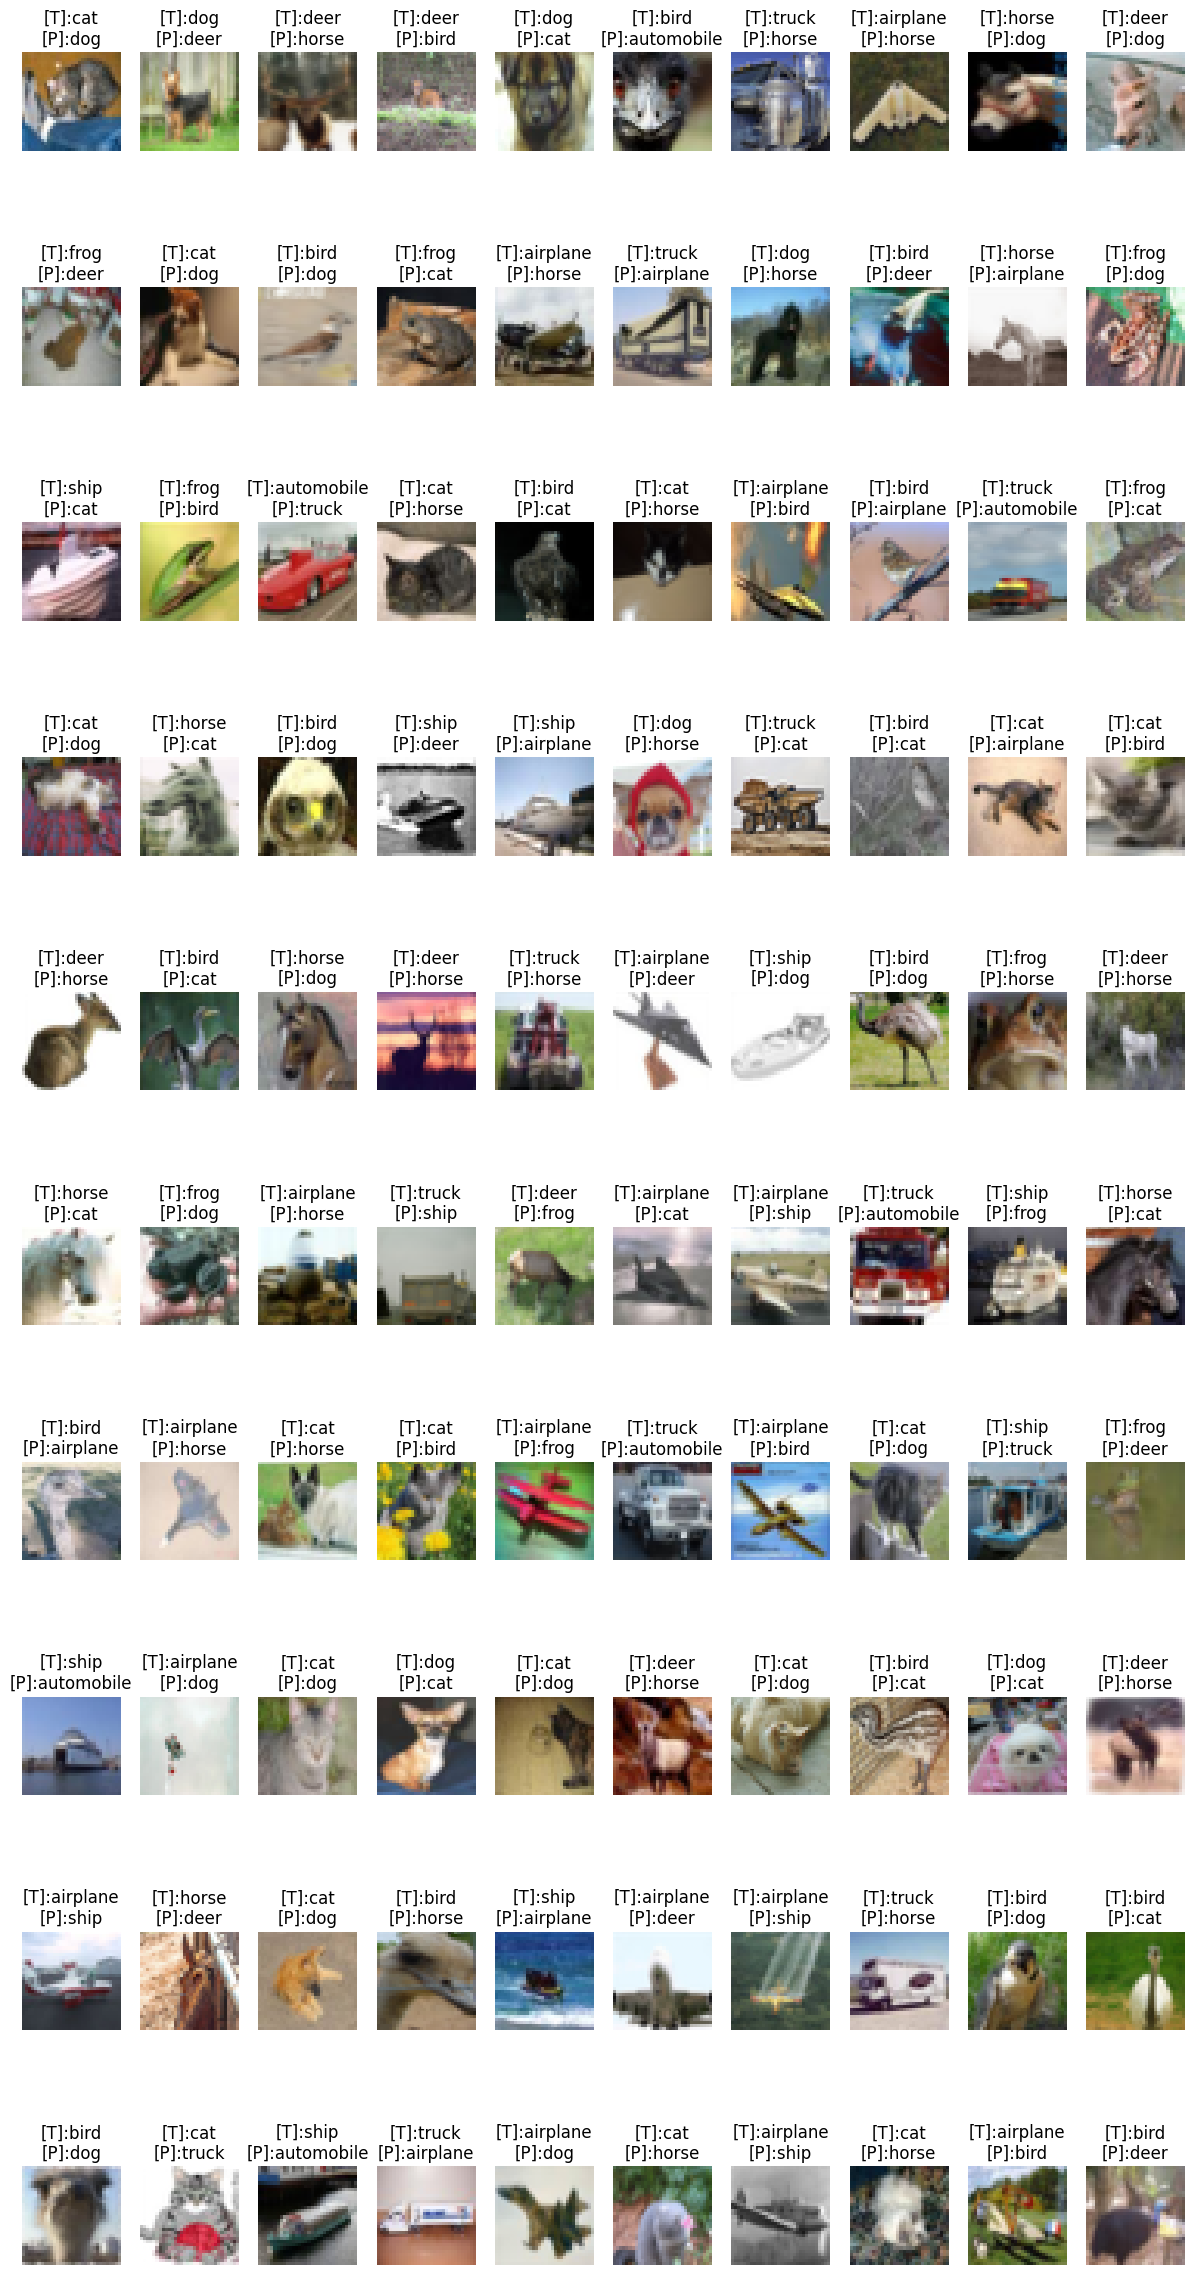

In [19]:
import matplotlib.pyplot as plt
import numpy as np
pre = model.predict(x_test_norm).argmax(axis=-1)
neq_idx = np.nonzero(pre != y_test)[0]
neq_idx_chosen = neq_idx[:100]
neq_x = x_test[neq_idx_chosen]
neq_pre = pre[neq_idx_chosen]
neq_true = y_test[neq_idx_chosen]

plt.figure(figsize=[15, 30])
for i in range(len(neq_idx_chosen)):
    plt.subplot(10, 10, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[neq_true[i]], trans[neq_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(neq_x[i])